In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow import keras


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('PruebaTG_basal_60_v2.xlsx')

In [4]:

df = df.drop(0)
df = df.reset_index(drop= True)

In [5]:
dups = df.pivot_table(index = ['Diagnostico'], aggfunc ='size') 
  
print(dups) 

Diagnostico
Intolerancia    865
Prediabetes      86
diabetes        582
sano            441
dtype: int64


In [6]:
#sano 0, intolerate a la glucosa = 1, prediabetes 2, diabetes = 3

df['Diagnostico'] = df['Diagnostico'].replace({'sano' : 0}, regex=True)

In [7]:
df['Diagnostico'] = df['Diagnostico'].replace({'Prediabetes' : 2}, regex=True)

In [8]:
df['Diagnostico'] = df['Diagnostico'].replace({'Intolerancia' : 1}, regex=True)


In [9]:
df['Diagnostico'] = df['Diagnostico'].replace({'diabetes' : 2}, regex=True)


In [10]:
#patients = df.drop(["Paciente","Edad","Diagnostico","Basal"], axis=1)
patients = df.drop(["Paciente","Edad","Basal"], axis=1)
patients.head(5)


,Diagnostico,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303
0,0,60.004290,60.032358,60.102989,60.230337,60.424699,60.693215,61.040332,61.468430,61.978012,...,67.290964,67.179632,67.069802,66.961453,66.854569,66.749132,66.645125,66.542531,66.441334,66.341516
1,2,60.012507,60.094142,60.299174,60.668398,61.231518,62.009280,63.014753,64.255080,65.731981,...,76.452648,76.202641,75.955848,75.712234,75.471766,75.234416,75.000151,74.768934,74.540733,74.315515
2,0,60.004776,60.035511,60.111593,60.246813,60.450653,60.729364,61.086583,61.524087,62.041994,...,96.516780,96.314195,96.112520,95.911752,95.711889,95.512930,95.314871,95.117711,94.921448,94.726079
3,1,60.013783,60.102333,60.320658,60.706248,61.282791,62.063130,63.052016,64.247523,65.643520,...,101.133081,100.819374,100.507520,100.197515,99.889356,99.583038,99.278559,98.975913,98.675098,98.376108
4,1,60.066331,60.401092,61.059443,62.021048,63.249316,64.706837,66.360503,68.180816,70.142696,...,96.546608,96.237432,95.930414,95.625542,95.322798,95.022191,94.723710,94.427320,94.133041,93.840863


<hr>

In [11]:
s = patients.shape
s[1]
x = [i for i in range(0,s[1],30)]
x


[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300]

In [12]:
a = [patients.iloc[1:,i] for i in range(1,s[1],30)]
a = np.array(a).T
a.shape



(1973, 10)

In [13]:
labels = df[['Diagnostico']]
labels

,Diagnostico
0,0
1,2
2,0
3,1
4,1
...,...
1969,2
1970,2
1971,1
1972,2


<hr>

In [14]:
import matplotlib.pyplot as plt

In [15]:
import numpy as np
#a = np.zeros((len(labels), 300))

In [16]:
#for i in range(0, len(labels)):
  #a[i,:]= patients.loc[i,:].to_numpy().T

In [17]:
for Id, group in patients.groupby('Diagnostico'):
    print(f'{Id}\n{group}\n')

0
      Diagnostico  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0               0   60.004290   60.032358   60.102989   60.230337   60.424699   
2               0   60.004776   60.035511   60.111593   60.246813   60.450653   
8               0   60.017397   60.126910   60.390995   60.847241   61.514791   
20              0   60.023888   60.175134   60.541915   61.178657   62.114351   
21              0   60.029147   60.196341   60.562407   61.140099   61.917656   
...           ...         ...         ...         ...         ...         ...   
1082            0   89.987089   90.027814   90.144805   90.343280   90.619940   
1083            0   89.985467   89.987970   90.019698   90.089392   90.202990   
1084            0   89.981717   89.982599   90.015630   90.089438   90.209345   
1094            0   90.005873   90.080471   90.269622   90.600213   91.084889   
1125            0   90.019966   90.145648   90.448351   90.970012   91.730427   

      Unnamed: 9  Unnamed

In [18]:
df_sano = pd.DataFrame(patients[(patients['Diagnostico'] == 0)])
df_intolerante = pd.DataFrame(patients[(patients['Diagnostico'] == 1)])
df_diabetico = pd.DataFrame(patients[(patients['Diagnostico'] == 2)])

In [19]:
sano = [df_sano.iloc[1:,i] for i in range(1,s[1],30)]
sano = np.array(a)
sano.shape

(1973, 10)

In [20]:
dfs = {Id:group for Id, group in patients.groupby('Diagnostico')}
#dfs = dict(tuple(df.groupby('id'))) #un poco más lento
#dfs = dict(df.goupby('id').__iter__()) #lo mismo

In [21]:
dfs[0].head(5)

,Diagnostico,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303
0,0,60.004290,60.032358,60.102989,60.230337,60.424699,60.693215,61.040332,61.468430,61.978012,...,67.290964,67.179632,67.069802,66.961453,66.854569,66.749132,66.645125,66.542531,66.441334,66.341516
2,0,60.004776,60.035511,60.111593,60.246813,60.450653,60.729364,61.086583,61.524087,62.041994,...,96.516780,96.314195,96.112520,95.911752,95.711889,95.512930,95.314871,95.117711,94.921448,94.726079
8,0,60.017397,60.126910,60.390995,60.847241,61.514791,62.399865,63.498724,64.801882,66.294666,...,67.834429,67.704806,67.576891,67.450662,67.326103,67.203195,67.081920,66.962259,66.844195,66.727709
20,0,60.023888,60.175134,60.541915,61.178657,62.114351,63.358877,64.908298,66.748869,68.860301,...,64.755693,64.675822,64.597616,64.521052,64.446104,64.372746,64.300952,64.230697,64.161954,64.094699
21,0,60.029147,60.196341,60.562407,61.140099,61.917656,62.873160,63.980096,65.212876,66.546765,...,90.264666,90.058875,89.854108,89.650359,89.447630,89.245926,89.045248,88.845588,88.646942,88.449310


In [22]:
sano = dfs[0]
sano.shape

(441, 301)

In [23]:
#sano1 = [sano.iloc[:,i] for i in range(3,s[1],30)]
sano2 = np.array(sano.iloc[:,1:301])
sano3 = pd.DataFrame(sano2)
sano3.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,60.004290,60.032358,60.102989,60.230337,60.424699,60.693215,61.040332,61.468430,61.978012,62.568277,...,67.290964,67.179632,67.069802,66.961453,66.854569,66.749132,66.645125,66.542531,66.441334,66.341516
1,60.004776,60.035511,60.111593,60.246813,60.450653,60.729364,61.086583,61.524087,62.041994,62.639446,...,96.516780,96.314195,96.112520,95.911752,95.711889,95.512930,95.314871,95.117711,94.921448,94.726079
2,60.017397,60.126910,60.390995,60.847241,61.514791,62.399865,63.498724,64.801882,66.294666,67.960752,...,67.834429,67.704806,67.576891,67.450662,67.326103,67.203195,67.081920,66.962259,66.844195,66.727709
3,60.023888,60.175134,60.541915,61.178657,62.114351,63.358877,64.908298,66.748869,68.860301,71.217198,...,64.755693,64.675822,64.597616,64.521052,64.446104,64.372746,64.300952,64.230697,64.161954,64.094699
4,60.029147,60.196341,60.562407,61.140099,61.917656,62.873160,63.980096,65.212876,66.546765,67.960878,...,90.264666,90.058875,89.854108,89.650359,89.447630,89.245926,89.045248,88.845588,88.646942,88.449310


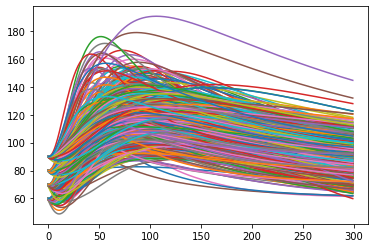

<Figure size 1440x504 with 0 Axes>

In [24]:
for i in range(0, len(sano2)):
  plt.plot(sano2[i,:])
plt.figure(figsize=(20,7))
plt.show()

In [25]:
sano.head()

,Diagnostico,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303
0,0,60.004290,60.032358,60.102989,60.230337,60.424699,60.693215,61.040332,61.468430,61.978012,...,67.290964,67.179632,67.069802,66.961453,66.854569,66.749132,66.645125,66.542531,66.441334,66.341516
2,0,60.004776,60.035511,60.111593,60.246813,60.450653,60.729364,61.086583,61.524087,62.041994,...,96.516780,96.314195,96.112520,95.911752,95.711889,95.512930,95.314871,95.117711,94.921448,94.726079
8,0,60.017397,60.126910,60.390995,60.847241,61.514791,62.399865,63.498724,64.801882,66.294666,...,67.834429,67.704806,67.576891,67.450662,67.326103,67.203195,67.081920,66.962259,66.844195,66.727709
20,0,60.023888,60.175134,60.541915,61.178657,62.114351,63.358877,64.908298,66.748869,68.860301,...,64.755693,64.675822,64.597616,64.521052,64.446104,64.372746,64.300952,64.230697,64.161954,64.094699
21,0,60.029147,60.196341,60.562407,61.140099,61.917656,62.873160,63.980096,65.212876,66.546765,...,90.264666,90.058875,89.854108,89.650359,89.447630,89.245926,89.045248,88.845588,88.646942,88.449310


In [26]:
ma = sano3.mean()
mstd = sano3.std()

#https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html

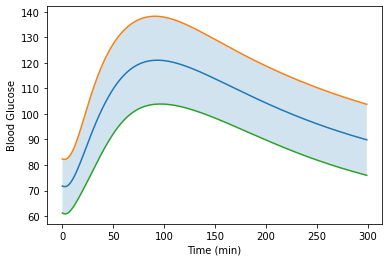

In [30]:
import numpy
import matplotlib.pyplot as plt

x = np.arange(0.0, 300, 1)

plt.plot(ma)
plt.xlabel("Time (min)")
plt.ylabel("Blood Glucose")
plt.plot(ma+mstd)
plt.plot(ma-mstd)
plt.fill_between(x, ma+mstd,ma-mstd, alpha=0.2)